In [1]:
# import numpy as np
import numpy as np

Linear Regression

In [2]:
class Linear_Regression():
    #initiating the parameters
    def __init__(self,learning_rate, number_of_iterations):
        self.learning_rate = learning_rate
        self.no_of_iterations = number_of_iterations
        
    def fit(self,X,y):
        # no of training examples & number of features
        self.m, self.n = X.shape
        
        # initializing weights and bias
        self.w = np.zeros(self.n)
        self.b = 0
        self.X = X
        self.y = y
        
        # gradient descent algorithm
        for _ in range(self.no_of_iterations):
            # calculating predictions
            
            self.update_weights()
            
        
    def update_weights(self):
        y_pred = self.predict(self.X)
            
        # calculating gradients
        dw = ( -2 * (self.X.T).dot(self.y - y_pred))/self.m
        db = (-2/self.m) * np.sum(self.y - y_pred)
            
        # updating weights and bias
        self.w -= self.learning_rate * dw
        self.b -= self.learning_rate * db
        
    def predict(self,X):
        return X.dot(self.w) + self.b

In [3]:

model = Linear_Regression(learning_rate=0.1,number_of_iterations=100)

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [5]:
salary_data = pd.read_csv("salary_data.csv")

In [6]:
salary_data.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [7]:
salary_data.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [8]:
salary_data.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [9]:
salary_data.tail()

,YearsExperience,Salary
25,9.0,105582
26,9.5,116969
27,9.6,112635
28,10.3,122391
29,10.5,121872


In [10]:
salary_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 612.0 bytes


In [11]:
salary_data.shape

(30, 2)

In [12]:
X, y = salary_data.iloc[:,:-1], salary_data.iloc[:,1]

In [13]:
X

,YearsExperience
0,1.1
1,1.3
2,1.5
3,2.0
4,2.2
5,2.9
6,3.0
7,3.2
8,3.2
9,3.7


In [14]:
y

0      39343
1      46205
2      37731
3      43525
4      39891
5      56642
6      60150
7      54445
8      64445
9      57189
10     63218
11     55794
12     56957
13     57081
14     61111
15     67938
16     66029
17     83088
18     81363
19     93940
20     91738
21     98273
22    101302
23    113812
24    109431
25    105582
26    116969
27    112635
28    122391
29    121872
Name: Salary, dtype: int64

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [16]:
X_train.shape

(24, 1)

In [17]:
model = Linear_Regression(0.000001,10000)

In [18]:
model.fit(X_train,y_train)

In [19]:
model.w

YearsExperience    6600.236936
dtype: float64

In [20]:
model.b

1088.9300832417255

In [21]:
y_test_pred = model.predict(X_test)

In [85]:
from sklearn.metrics import mean_squared_error

In [86]:
mean_squared_error(y_test, y_test_pred)

1990772281.7775278

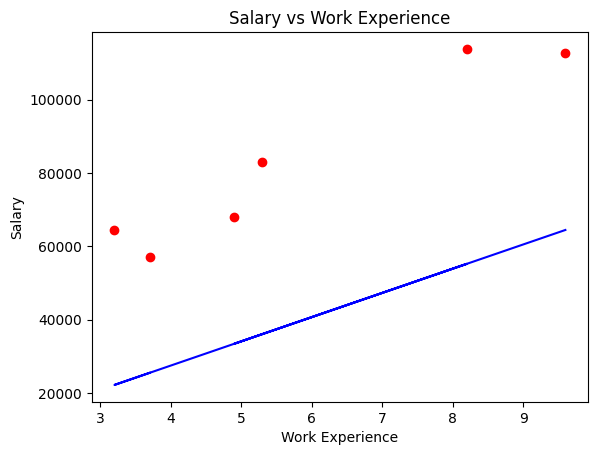

In [87]:
plt.scatter(X_test, y_test,color='r')
plt.plot(X_test, y_test_pred,color='b')
plt.xlabel("Work Experience")
plt.ylabel("Salary")
plt.title("Salary vs Work Experience")
plt.show()